# CENSO

Para calcular el nivel socioecononico voy a usar la siguiente metodología. Tomando:

1. Número de hogares con computadora: Indica la cantidad de hogares que tienen al menos una computadora.

2. Porcentaje de menores de 18 años asistiendo a establecimientos educativos: Calculado como la proporción de menores de 18 años que asisten a algún establecimiento educativo respecto al total de menores de 18 años.

3. Porcentaje de habitantes mayores de 25 años con nivel universitario completo: Calculado como la proporción de habitantes mayores de 25 años con nivel universitario completo respecto al total de habitantes mayores de 25 años.

$IndiceComputadora = \frac{NúmeroDeHogaresConComputadora}{ConComputadora \cup ConHeladera \cup ConCelular \cup ConTeléfono}$

$IndiceEscolaridad = \frac{MenoresDe18Asisten}{MenoresDe18}$

$IndiceEducSuperior = \frac{MayoresDe25Universitarios}{MayoresDe25}$

PC1=0.76120783∗IndiceEducSup+0.10759338∗IndiceEscolaridad+0.63952037∗IndiceCompu

El PC1 arroja un rango de valores entre 0 y 1.32 (aproximadamente) se procede a una normalización para facilitar la lectura de los valores.

$NSE = \frac{PC1}{PC1Max} * 10$

De esta manera todos los valores del índice de NSE de radios censales se expresan en una escala del 0 al 10, donde 10 es el máximo valor de NSE alcanzado por el primer radio censal del ranking y 0 es el mínimo 

(fuente: https://gcba.github.io/tod/nota_metodologica#2-estimacion-del-nivel-socioeconomico-de-un-radio-censal)

Valor Bajo (0-3): Puede indicar un nivel socioeconómico bajo, con posiblemente menos acceso a recursos y oportunidades.

Valor Medio (4-7): Podría sugerir un nivel socioeconómico medio, con un acceso moderado a recursos y oportunidades.

Valor Alto (8-10): Indicaría un nivel socioeconómico relativamente alto, con un buen acceso a recursos y oportunidades.

# Comuna 1


In [13]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.decomposition import PCA 

In [14]:
def calcular_indice_computadora(numero_hogares_con_computadora, con_computadora, con_heladera, con_celular, con_telefono):
    indice_computadora = numero_hogares_con_computadora / (con_computadora + con_heladera + con_celular + con_telefono)
    return indice_computadora

# Parámetros para comuna 1
numero_hogares_con_computadora_c1 = 51500
con_computadora_c1 = 51500
con_heladera_c1 = 77558
con_celular_c1 = 73457
con_telefono_c1 = 60208

# Calcular el índice de computadora 
indice_computadora_c1 = calcular_indice_computadora(numero_hogares_con_computadora_c1, con_computadora_c1, con_heladera_c1, con_celular_c1, con_telefono_c1)

print("Índice de Computadora - Comuna 1:", indice_computadora_c1)

Índice de Computadora - Comuna 1: 0.19602394917841223


In [15]:
def calcular_indice_escolaridad(menores_de_18_asisten, menores_de_18):
    indice_escolaridad = menores_de_18_asisten / menores_de_18
    return indice_escolaridad


menores_de_18_asisten_c1 = 2985 + 1991 + 13712 + 3865 + 5164
menores_de_18_c1 = 4162 + 2130 + 13922 + 4010 + 5958

# Calcular el índice de escolaridad para comuna 1
indice_escolaridad_c1 = calcular_indice_escolaridad(menores_de_18_asisten_c1, menores_de_18_c1)

print("Índice de Escolaridad - Comuna 1:", indice_escolaridad_c1)

Índice de Escolaridad - Comuna 1: 0.9183288052481612


In [16]:
def calcular_indice_educacion_superior(mayores_de_25_universitarios, mayores_de_25):
    indice_educacion_superior = mayores_de_25_universitarios / mayores_de_25
    return indice_educacion_superior

# Parámetros para comuna 1
mayores_de_25_universitarios_c1 = 3606+3594
mayores_de_25_c1 =  21421 + 121658

# Calcular el índice de educación superior para comuna 1
indice_educacion_superior_c1 = calcular_indice_educacion_superior(mayores_de_25_universitarios_c1, mayores_de_25_c1)

print("Índice de Educación Superior - Caso 1:", indice_educacion_superior_c1)

Índice de Educación Superior - Caso 1: 0.05032185016669113


In [17]:
def calcular_pca(indice_educacion_superior, indice_escolaridad, indice_computadora, n_components=3):
    # Calcula la matriz 
    matriz_correlaciones = np.array([
        [1, indice_educacion_superior, indice_computadora],
        [indice_educacion_superior, 1, indice_escolaridad],
        [indice_computadora, indice_escolaridad, 1]
    ])

    # Realiza el análisis de componentes principales
    pca = PCA(n_components=n_components)
    pca.fit(matriz_correlaciones)

    # Obtiene los componentes principales y la varianza explicada
    componentes_principales = pca.components_
    varianza_explicada = pca.explained_variance_ratio_

    return componentes_principales, varianza_explicada

componentes_principales, varianza_explicada = calcular_pca(indice_educacion_superior_c1, indice_escolaridad_c1, indice_computadora_c1)

print("\nComponentes Principales:")
print(componentes_principales)

print("\nVarianza Explicada:")
print(varianza_explicada)


Componentes Principales:
[[ 0.59716869 -0.61669895 -0.51290541]
 [ 0.55586614 -0.14282156  0.81891076]
 [ 0.57827536  0.77413461 -0.2575135 ]]

Varianza Explicada:
[9.91308314e-01 8.69168597e-03 2.19902466e-35]


In [18]:
def calcular_pc1(indice_educacion_superior, indice_escolaridad, indice_computadora):
    # Coeficientes para el cálculo de PC1
    coef_educ_sup = 0.76120783
    coef_escolaridad = 0.10759338
    coef_computadora = 0.63952037

    # Calcula PC1
    pc1 = coef_educ_sup * indice_educacion_superior + coef_escolaridad * indice_escolaridad + coef_computadora * indice_computadora

    return pc1

# Calcula PC1
pc1_resultado = calcular_pc1(indice_educacion_superior_c1, indice_escolaridad_c1, indice_computadora_c1)
print("PC1:", pc1_resultado)

PC1: 0.2624727949824229


In [19]:
def normalizar_pc1(pc1, pc1_max):
    # Normaliza PC1
    nse = (pc1 / pc1_max) * 10
    return nse

pc1_max = varianza_explicada [0]

# Normaliza PC1
nse_resultado = normalizar_pc1(pc1_resultado, pc1_max)
print("NSE:", nse_resultado)

NSE: 2.647741285609049


El valor normalizado del índice socioeconómico (NSE) obtenido a través del análisis de componentes principales (PCA) representa una medida relativa del nivel socioeconómico, en el caso de la comuna 1 es de 2.647741285609049 y en esta comuna ganó la presidencia Juntos por el cambio. 

# Comuna 2

In [20]:
# Parámetros para comuna 2
numero_hogares_con_computadora_c2 = 57998
con_computadora_c2 = 57998
con_heladera_c2= 72641
con_celular_c2 = 65253
con_telefono_c2 = 68708

# Calcular el índice de computadora 
indice_computadora_c2 = calcular_indice_computadora(numero_hogares_con_computadora_c2, con_computadora_c2, con_heladera_c2, con_celular_c2, con_telefono_c2)

print("Índice de Computadora - Comuna 1:", indice_computadora_c2)

Índice de Computadora - Comuna 1: 0.2191912320483749


In [21]:
menores_de_18_asisten_c2 = 2109+1188+7719+2173+3447
menores_de_18_c2 = 2276+1211+7762+2209+3636

# Calcular el índice de escolaridad para comuna 2
indice_escolaridad_c2 = calcular_indice_escolaridad(menores_de_18_asisten_c2, menores_de_18_c2)

print("Índice de Escolaridad - Comuna 1:", indice_escolaridad_c2)

Índice de Escolaridad - Comuna 1: 0.9732069732069732


In [22]:
def calcular_indice_educacion_superior(mayores_de_25_universitarios, mayores_de_25):
    indice_educacion_superior = mayores_de_25_universitarios / mayores_de_25
    return indice_educacion_superior

# Parámetros para comuna 2
mayores_de_25_universitarios_c2 = 6338+6424
mayores_de_25_c2 =  98551+16686

# Calcular el índice de educación superior para comuna 2
indice_educacion_superior_c2 = calcular_indice_educacion_superior(mayores_de_25_universitarios_c2, mayores_de_25_c2)

print("Índice de Educación Superior - Caso 2:", indice_educacion_superior_c2)

Índice de Educación Superior - Caso 2: 0.11074568064076643


In [23]:
componentes_principales_2, varianza_explicada_2 = calcular_pca(indice_educacion_superior_c2, indice_escolaridad_c2, indice_computadora_c2)

print("\nComponentes Principales - Comuna 2:")
print(componentes_principales_2)

print("\nVarianza Explicada - Comuna 2:")
print(varianza_explicada_2)



Componentes Principales - Comuna 2:
[[ 0.58441822 -0.61091642 -0.53407534]
 [ 0.74355888  0.13962904  0.65392961]
 [ 0.32492391  0.77928483 -0.53585409]]

Varianza Explicada - Comuna 2:
[9.96754522e-01 3.24547823e-03 4.62078085e-34]


In [24]:
pc2_resultado = calcular_pc1(indice_educacion_superior_c2, indice_escolaridad_c2, indice_computadora_c2)
print("PC2:", pc2_resultado)

PC2: 0.32918836474967106


In [25]:
pc2_max = varianza_explicada_2 [0]
# Normaliza PC2
nse_resultado2 = normalizar_pc1(pc2_resultado, pc2_max)
print("NSE:", nse_resultado2)

NSE: 3.30260217095617


El valor normalizado del índice socioeconómico (NSE) obtenido a través del análisis de componentes principales (PCA) representa una medida relativa del nivel socioeconómico, en el caso de la comuna 1 es de 3.30260217095617 y en esta comuna ganó la presidencia Juntos por el cambio.) Se ubicaria en el nivel medio. 

# Comuna 3

In [26]:
# Parámetros para comuna 3
numero_hogares_con_computadora_c3 = 51631
con_computadora_c3 = 51631
con_heladera_c3 = 76928
con_celular_c3 =69059
con_telefono_c3 = 64202
# Calcular el índice de computadora para comuna 3
indice_computadora_c3 = calcular_indice_computadora(numero_hogares_con_computadora_c3, con_computadora_c3, con_heladera_c3, con_celular_c3, con_telefono_c3)

print("Índice de Computadora - Comuna 3:", indice_computadora_c3)

menores_de_18_asisten_c3 = 3073+1833+12631+3502+4979
menores_de_18_c3 = +3722+1895+12739+3580+5517

# Calcular el índice de escolaridad para comuna 3
indice_escolaridad_c3 = calcular_indice_escolaridad(menores_de_18_asisten_c3, menores_de_18_c3)

print("Índice de Escolaridad - Comuna 3:", indice_escolaridad_c3)

# Parámetros para comuna 3
mayores_de_25_universitarios_c3 = 3749+3768
mayores_de_25_c3 = 17794+114907

# Calcular el índice de educación superior para comuna 3
indice_educacion_superior_c3 = calcular_indice_educacion_superior(mayores_de_25_universitarios_c3, mayores_de_25_c3)

print("Índice de Educación Superior - Comuna 3:", indice_educacion_superior_c3)


Índice de Computadora - Comuna 3: 0.19720036666412039
Índice de Escolaridad - Comuna 3: 0.9477288456634976
Índice de Educación Superior - Comuna 3: 0.05664614433953022


In [27]:
# Calcular PCA para comuna 3
componentes_principales_c3, varianza_explicada_c3 = calcular_pca(indice_educacion_superior_c3, indice_escolaridad_c3, indice_computadora_c3)

print("\nComponentes Principales - Comuna 3:")
print(componentes_principales_c3)

print("\nVarianza Explicada - Comuna 3:")
print(varianza_explicada_c3)

# Calcula PC1 para comuna 3
pc1_resultado_c3 = calcular_pc1(indice_educacion_superior_c3, indice_escolaridad_c3, indice_computadora_c3)
print("PC1 - Comuna 3:", pc1_resultado_c3)

# Normaliza PC1 para comuna 3
pc1_max_c3 = varianza_explicada_c3[0]
nse_resultado_c3 = normalizar_pc1(pc1_resultado_c3, pc1_max_c3)
print("NSE - Comuna 3:", nse_resultado_c3)



Componentes Principales - Comuna 3:
[[ 0.5903815  -0.61738243 -0.5198929 ]
 [ 0.67013366  0.01593488  0.74206938]
 [-0.44985616 -0.78650176  0.4231364 ]]

Varianza Explicada - Comuna 3:
[9.94100011e-01 5.89998915e-03 2.54679416e-33]
PC1 - Comuna 3: 0.27120248989216855
NSE - Comuna 3: 2.7281207819433324


El valor normalizado del índice socioeconómico (NSE) obtenido a través del análisis de componentes principales (PCA) representa una medida relativa del nivel socioeconómico, en el caso de la comuna 1 es de 2.7281207819433324 y en esta comuna ganó la presidencia Juntos por el cambio.) Se ubicaria en el nivel bajo.

# Comuna 4

In [28]:
# Parámetros para comuna 4
numero_hogares_con_computadora_c4 = 42164
con_computadora_c4 = 42164
con_heladera_c4 = 73047
con_celular_c4 =65630
con_telefono_c4 = 53996

# Calcular el índice de computadora para comuna 4
indice_computadora_c4 = calcular_indice_computadora(numero_hogares_con_computadora_c4, con_computadora_c4, con_heladera_c4, con_celular_c4, con_telefono_c4)

print("Índice de Computadora - Comuna 4:", indice_computadora_c4)

menores_de_18_asisten_c4 = 4610+2869+20869+5901
menores_de_18_c4 = 5950+2991+21056+6111+9038
# Calcular el índice de escolaridad para comuna 4
indice_escolaridad_c4 = calcular_indice_escolaridad(menores_de_18_asisten_c4, menores_de_18_c4)

print("Índice de Escolaridad - Comuna 4:", indice_escolaridad_c4)

# Parámetros para comuna 4
mayores_de_25_universitarios_c4 = 2011+2255
mayores_de_25_c4 = 18214+120267

# Calcular el índice de educación superior para comuna 4
indice_educacion_superior_c4 = calcular_indice_educacion_superior(mayores_de_25_universitarios_c4, mayores_de_25_c4)

print("Índice de Educación Superior - Comuna 4:", indice_educacion_superior_c4)


Índice de Computadora - Comuna 4: 0.17954581262748204
Índice de Escolaridad - Comuna 4: 0.7586275639037788
Índice de Educación Superior - Comuna 4: 0.030805670091925967


In [29]:
# Calcular PCA para comuna 4
componentes_principales_c4, varianza_explicada_c4 = calcular_pca(indice_educacion_superior_c4, indice_escolaridad_c4, indice_computadora_c4)

print("\nComponentes Principales - Comuna 4:")
print(componentes_principales_c4)

print("\nVarianza Explicada - Comuna 4:")
print(varianza_explicada_c4)

# Calcula PC1 para comuna 4
pc1_resultado_c4 = calcular_pc1(indice_educacion_superior_c4, indice_escolaridad_c4, indice_computadora_c4)
print("PC1 - Comuna 4:", pc1_resultado_c4)

# Normaliza PC1 para comuna 4
pc1_max_c4 = varianza_explicada_c4[0]
nse_resultado_c4 = normalizar_pc1(pc1_resultado_c4, pc1_max_c4)
print("NSE - Comuna 4:", nse_resultado_c4)



Componentes Principales - Comuna 4:
[[ 0.6344287  -0.60624151 -0.47955339]
 [ 0.19806044 -0.47218973  0.85895804]
 [-0.74717621 -0.63992819 -0.17949826]]

Varianza Explicada - Comuna 4:
[9.56102992e-01 4.38970081e-02 1.58696817e-34]
PC1 - Comuna 4: 0.2198960255674224
NSE - Comuna 4: 2.2999198562998653


 El valor normalizado del índice socioeconómico (NSE) obtenido a través del análisis de componentes principales (PCA) representa una medida relativa del nivel socioeconómico, en el caso de la comuna 1 es de 2.2999198562998653 y en esta comuna ganó la presidencia Unión por la patria. Se ubicaria en el nivel bajo.

# Comuna 5

In [30]:
# Parámetros para comuna 5
numero_hogares_con_computadora_c5 = 54204
con_computadora_c5 = 54204
con_heladera_c5 = 75319
con_celular_c5 = 67096
con_telefono_c5 =66779
# Calcular el índice de computadora para comuna 5
indice_computadora_c5 = calcular_indice_computadora(numero_hogares_con_computadora_c5, con_computadora_c5, con_heladera_c5, con_celular_c5, con_telefono_c5)

print("Índice de Computadora - Comuna 5:", indice_computadora_c5)

menores_de_18_asisten_c5 = 3072+1746+11875+3166+4786
menores_de_18_c5 = 3430+1776+11950+3228+5160

# Calcular el índice de escolaridad para comuna 5
indice_escolaridad_c5 = calcular_indice_escolaridad(menores_de_18_asisten_c5, menores_de_18_c5)

print("Índice de Escolaridad - Comuna 5:", indice_escolaridad_c5)

# Parámetros para comuna 5
mayores_de_25_universitarios_c5 = 3648+3823
mayores_de_25_c5 = 15948+114409
# Calcular el índice de educación superior para comuna 5
indice_educacion_superior_c5 = calcular_indice_educacion_superior(mayores_de_25_universitarios_c5, mayores_de_25_c5)

print("Índice de Educación Superior - Comuna 5:", indice_educacion_superior_c5)


Índice de Computadora - Comuna 5: 0.20578743954016354
Índice de Escolaridad - Comuna 5: 0.9648058252427184
Índice de Educación Superior - Comuna 5: 0.05731184362941768


In [31]:
# Calcular PCA para comuna 5
componentes_principales_c5, varianza_explicada_c5 = calcular_pca(indice_educacion_superior_c5, indice_escolaridad_c5, indice_computadora_c5)

print("\nComponentes Principales - Comuna 5:")
print(componentes_principales_c5)

print("\nVarianza Explicada - Comuna 5:")
print(varianza_explicada_c5)

# Calcula PC1 para comuna 5
pc1_resultado_c5 = calcular_pc1(indice_educacion_superior_c5, indice_escolaridad_c5, indice_computadora_c5)
print("PC1 - Comuna 5:", pc1_resultado_c5)

# Normaliza PC1 para comuna 5
pc1_max_c5 = varianza_explicada_c5[0]
nse_resultado_c5 = normalizar_pc1(pc1_resultado_c5, pc1_max_c5)
print("NSE - Comuna 5:", nse_resultado_c5)



Componentes Principales - Comuna 5:
[[ 0.58670199 -0.62119825 -0.51951277]
 [ 0.74624878  0.16560954  0.64473734]
 [-0.31447343 -0.76595445  0.56073188]]

Varianza Explicada - Comuna 5:
[9.94507202e-01 5.49279837e-03 5.39062666e-35]
PC1 - Comuna 5: 0.2790382033800798
NSE - Comuna 5: 2.8057936928104485


El valor normalizado del índice socioeconómico (NSE) obtenido a través del análisis de componentes principales (PCA) representa una medida relativa del nivel socioeconómico, en el caso de la comuna 1 es de 2.8057936928104485 y en esta comuna ganó la presidencia Juntos por el cambio. Se ubicaria en el nivel bajo.

# Comuna 6

In [32]:
# Parámetros para comuna 6
numero_hogares_con_computadora_c6 = 56637
con_computadora_c6 = 56637  
con_heladera_c6 = 74619  
con_celular_c6 = 66241 
con_telefono_c6 = 69116

# Calcular el índice de computadora para comuna 6
indice_computadora_c6 = calcular_indice_computadora(numero_hogares_con_computadora_c6, con_computadora_c6, con_heladera_c6, con_celular_c6, con_telefono_c6)

print("Índice de Computadora - Comuna 6:", indice_computadora_c6)

menores_de_18_asisten_c6 = 3241+1707+11237+2952+4530
menores_de_18_c6 = 3467+1732+11302+3007+4785

# Calcular el índice de escolaridad para comuna 6
indice_escolaridad_c6 = calcular_indice_escolaridad(menores_de_18_asisten_c6, menores_de_18_c6)

print("Índice de Escolaridad - Comuna 6:", indice_escolaridad_c6)

# Parámetros para comuna 6
mayores_de_25_universitarios_c6 = 3407+3699
mayores_de_25_c6 = 14191+116538

# Calcular el índice de educación superior para comuna 6
indice_educacion_superior_c6 = calcular_indice_educacion_superior(mayores_de_25_universitarios_c6, mayores_de_25_c6)

print("Índice de Educación Superior - Comuna 6:", indice_educacion_superior_c6)


Índice de Computadora - Comuna 6: 0.21243150183974524
Índice de Escolaridad - Comuna 6: 0.9742312600337546
Índice de Educación Superior - Comuna 6: 0.05435672268586159


In [33]:
# Calcular PCA para comuna 6
componentes_principales_c6, varianza_explicada_c6 = calcular_pca(indice_educacion_superior_c6, indice_escolaridad_c6, indice_computadora_c6)

print("\nComponentes Principales - Comuna 6:")
print(componentes_principales_c6)

print("\nVarianza Explicada - Comuna 6:")
print(varianza_explicada_c6)

# Calcula PC1 para comuna 6
pc1_resultado_c6 = calcular_pc1(indice_educacion_superior_c6, indice_escolaridad_c6, indice_computadora_c6)
print("PC1 - Comuna 6:", pc1_resultado_c6)

# Normaliza PC1 para comuna 6
pc1_max_c6 = varianza_explicada_c6[0]
nse_resultado_c6 = normalizar_pc1(pc1_resultado_c6, pc1_max_c6)
print("NSE - Comuna 6:", nse_resultado_c6)


Componentes Principales - Comuna 6:
[[ 0.58477034 -0.6247822  -0.5173885 ]
 [ 0.77963498  0.25667772  0.57121436]
 [ 0.22408247  0.73740339 -0.63719957]]

Varianza Explicada - Comuna 6:
[9.94208444e-01 5.79155597e-03 7.97786662e-34]
PC1 - Comuna 6: 0.28205186974651664
NSE - Comuna 6: 2.8369490466490124


El valor normalizado del índice socioeconómico (NSE) obtenido a través del análisis de componentes principales (PCA) representa una medida relativa del nivel socioeconómico, en el caso de la comuna 1 es de 2.8369490466490124 y en esta comuna ganó la presidencia Juntos por el cambio. Se ubicaria en el nivel bajo.

# Comuna 7

In [34]:
# Parámetros para comuna 7
numero_hogares_con_computadora_c7 = 50522
con_computadora_c7 = 50522
con_heladera_c7 = 77467
con_celular_c7 = 69993
con_telefono_c7 = 17344

# Calcular el índice de computadora para comuna 7
indice_computadora_c7 = calcular_indice_computadora(numero_hogares_con_computadora_c7, con_computadora_c7, con_heladera_c7, con_celular_c7, con_telefono_c7)

print("Índice de Computadora - Comuna 7:", indice_computadora_c7)

menores_de_18_asisten_c7 = 4234+2675+18611+5106+7079
menores_de_18_c7 = 5581+2795+18779+5259+7955


# Calcular el índice de escolaridad para comuna 7
indice_escolaridad_c7 = calcular_indice_escolaridad(menores_de_18_asisten_c7, menores_de_18_c7)

print("Índice de Escolaridad - Comuna 7:", indice_escolaridad_c7)

# Parámetros para comuna 7
mayores_de_25_universitarios_c7 = 2706+2887
mayores_de_25_c7 = 17836+129955


# Calcular el índice de educación superior para comuna 7
indice_educacion_superior_c7 = calcular_indice_educacion_superior(mayores_de_25_universitarios_c7, mayores_de_25_c7)

print("Índice de Educación Superior - Comuna 7:", indice_educacion_superior_c7)


Índice de Computadora - Comuna 7: 0.23463028152661547
Índice de Escolaridad - Comuna 7: 0.9340087691050063
Índice de Educación Superior - Comuna 7: 0.03784398238052385


In [35]:
# Calcular PCA para comuna 7
componentes_principales_c7, varianza_explicada_c7 = calcular_pca(indice_educacion_superior_c7, indice_escolaridad_c7, indice_computadora_c7)

print("\nComponentes Principales - Comuna 7:")
print(componentes_principales_c7)

print("\nVarianza Explicada - Comuna 7:")
print(varianza_explicada_c7)

# Calcula PC1 para comuna 7
pc1_resultado_c7 = calcular_pc1(indice_educacion_superior_c7, indice_escolaridad_c7, indice_computadora_c7)
print("PC1 - Comuna 7:", pc1_resultado_c7)

# Normaliza PC1 para comuna 7
pc1_max_c7 = varianza_explicada_c7[0]
nse_resultado_c7 = normalizar_pc1(pc1_resultado_c7, pc1_max_c7)
print("NSE - Comuna 7:", nse_resultado_c7)


Componentes Principales - Comuna 7:
[[ 0.59504572 -0.63370195 -0.49431005]
 [ 0.68550826  0.07914046  0.7237508 ]
 [-0.41952237 -0.76951844  0.48150012]]

Varianza Explicada - Comuna 7:
[9.89114820e-01 1.08851798e-02 7.78801744e-34]
PC1 - Comuna 7: 0.2793511405791893
NSE - Comuna 7: 2.824253917385751


El valor normalizado del índice socioeconómico (NSE) obtenido a través del análisis de componentes principales (PCA) representa una medida relativa del nivel socioeconómico, en el caso de la comuna 1 es de 2.824253917385751 y en esta comuna ganó la presidencia -----. Se ubicaria en el nivel bajo.

# Comuna 8 

In [36]:
# Parámetros para comuna 8
numero_hogares_con_computadora_c8 = 25731
con_computadora_c8 = 25731
con_heladera_c8 = 54079
con_celular_c8 = 49102
con_telefono_c8 = 34673

# Calcular el índice de computadora para comuna 8
indice_computadora_c8 = calcular_indice_computadora(numero_hogares_con_computadora_c8, con_computadora_c8, con_heladera_c8, con_celular_c8, con_telefono_c8)

print("Índice de Computadora - Comuna 8:", indice_computadora_c8)

menores_de_18_asisten_c8 = 4270+2955+21064+5725+7371
menores_de_18_c8 = 6443+3163+21321+5995+8892


# Calcular el índice de escolaridad para comuna 8
indice_escolaridad_c8 = calcular_indice_escolaridad(menores_de_18_asisten_c8, menores_de_18_c8)

print("Índice de Escolaridad - Comuna 8:", indice_escolaridad_c8)

# Parámetros para comuna 8
mayores_de_25_universitarios_c8 = 969+980
mayores_de_25_c8 = +16082+91054


# Calcular el índice de educación superior para comuna 8
indice_educacion_superior_c8 = calcular_indice_educacion_superior(mayores_de_25_universitarios_c8, mayores_de_25_c8)

print("Índice de Educación Superior - Comuna 8:", indice_educacion_superior_c8)


Índice de Computadora - Comuna 8: 0.1572943729559556
Índice de Escolaridad - Comuna 8: 0.9033264940847776
Índice de Educación Superior - Comuna 8: 0.018191830943847073


In [37]:
# Calcular PCA para comuna 8
componentes_principales_c8, varianza_explicada_c8 = calcular_pca(indice_educacion_superior_c8, indice_escolaridad_c8, indice_computadora_c8)

print("\nComponentes Principales - Comuna 8:")
print(componentes_principales_c8)

print("\nVarianza Explicada - Comuna 8:")
print(varianza_explicada_c8)

# Calcula PC1 para comuna 8
pc1_resultado_c8 = calcular_pc1(indice_educacion_superior_c8, indice_escolaridad_c8, indice_computadora_c8)
print("PC1 - Comuna 8:", pc1_resultado_c8)

# Normaliza PC1 para comuna 8
pc1_max_c8 = varianza_explicada_c8[0]
nse_resultado_c8 = normalizar_pc1(pc1_resultado_c8, pc1_max_c8)
print("NSE - Comuna 8:", nse_resultado_c8)


Componentes Principales - Comuna 8:
[[ 0.59954538 -0.61213118 -0.51559748]
 [ 0.48667077 -0.23259486  0.84205177]
 [-0.63537147 -0.75577447  0.15845518]]

Varianza Explicada - Comuna 8:
[9.90629997e-01 9.37000286e-03 2.08205195e-33]
PC1 - Comuna 8: 0.21163267049033463
NSE - Comuna 8: 2.136344256706839


El valor normalizado del índice socioeconómico (NSE) obtenido a través del análisis de componentes principales (PCA) representa una medida relativa del nivel socioeconómico, en el caso de la comuna 1 es de 2.136344256706839 y en esta comuna ganó la presidencia -----. Se ubicaria en el nivel bajo.

# Comuna 9

In [38]:
# Parámetros para comuna 9
numero_hogares_con_computadora_c9 = 34236
con_computadora_c9 = 34236
con_heladera_c9 = 55333
con_celular_c9 = 47786
con_telefono_c9 = 46871

# Calcular el índice de computadora para comuna 9
indice_computadora_c9 = calcular_indice_computadora(numero_hogares_con_computadora_c9, con_computadora_c9, con_heladera_c9, con_celular_c9, con_telefono_c9)

print("Índice de Computadora - Comuna 9:", indice_computadora_c9)

menores_de_18_asisten_c9 = 3114+2045+13888+3906+5406
menores_de_18_c9 = 4034+2137+14034+4009+6071


# Calcular el índice de escolaridad para comuna 9
indice_escolaridad_c9 = calcular_indice_escolaridad(menores_de_18_asisten_c9, menores_de_18_c9)

print("Índice de Escolaridad - Comuna 9:", indice_escolaridad_c9)

# Parámetros para comuna 9
mayores_de_25_universitarios_c9 = 1534+1657
mayores_de_25_c9 = 11934+97476


# Calcular el índice de educación superior para comuna 9
indice_educacion_superior_c9 = calcular_indice_educacion_superior(mayores_de_25_universitarios_c9, mayores_de_25_c9)

print("Índice de Educación Superior - Comuna 9:", indice_educacion_superior_c9)


Índice de Computadora - Comuna 9: 0.18583696112383702
Índice de Escolaridad - Comuna 9: 0.9364041604754829
Índice de Educación Superior - Comuna 9: 0.029165524175121103


In [39]:
 #Calcular PCA para comuna 9
componentes_principales_c9, varianza_explicada_c9 = calcular_pca(indice_educacion_superior_c9, indice_escolaridad_c9, indice_computadora_c9)

print("\nComponentes Principales - Comuna 9:")
print(componentes_principales_c9)

print("\nVarianza Explicada - Comuna 9:")
print(varianza_explicada_c9)

# Calcula PC1 para comuna 9
pc1_resultado_c9 = calcular_pc1(indice_educacion_superior_c9, indice_escolaridad_c9, indice_computadora_c9)
print("PC1 - Comuna 9:", pc1_resultado_c9)

# Normaliza PC1 para comuna 9
pc1_max_c9 = varianza_explicada_c9[0]
nse_resultado_c9 = normalizar_pc1(pc1_resultado_c9, pc1_max_c9)
print("NSE - Comuna 9:", nse_resultado_c9)


Componentes Principales - Comuna 9:
[[ 0.59291564 -0.62053694 -0.51321043]
 [ 0.64756882 -0.01139738  0.76192173]
 [-0.47864983 -0.78409439  0.39508269]]

Varianza Explicada - Comuna 9:
[9.92624487e-01 7.37551298e-03 1.62955569e-32]
PC1 - Comuna 9: 0.24179843617736796
NSE - Comuna 9: 2.4359507481352645


El valor normalizado del índice socioeconómico (NSE) obtenido a través del análisis de componentes principales (PCA) representa una medida relativa del nivel socioeconómico, en el caso de la comuna 1 es de 2.4359507481352645 y en esta comuna ganó la presidencia -----. Se ubicaria en el nivel bajo.

# Comuna 10

In [40]:
# Parámetros para comuna 10
numero_hogares_con_computadora_c10 = 41245
con_computadora_c10 =41245
con_heladera_c10 = 60532
con_celular_c10 = 52744
con_telefono_c10 = 53988

# Calcular el índice de computadora para comuna 10
indice_computadora_c10 = calcular_indice_computadora(numero_hogares_con_computadora_c10, con_computadora_c10, con_heladera_c10, con_celular_c10, con_telefono_c10)

print("Índice de Computadora - Comuna 10:", indice_computadora_c10)

menores_de_18_asisten_c10 = 3277+1982+12711+3463+5163
menores_de_18_c10 = 3728+2032+12807+3550+5615


# Calcular el índice de escolaridad para comuna 10
indice_escolaridad_c10 = calcular_indice_escolaridad(menores_de_18_asisten_c10, menores_de_18_c10)

print("Índice de Escolaridad - Comuna 10:", indice_escolaridad_c10)

# Parámetros para comuna 10
mayores_de_25_universitarios_c10 = 2037+2205
mayores_de_25_c10 = 12239+104671


# Calcular el índice de educación superior para comuna 10
indice_educacion_superior_c10 = calcular_indice_educacion_superior(mayores_de_25_universitarios_c10, mayores_de_25_c10)

print("Índice de Educación Superior - Comuna 10:", indice_educacion_superior_c10)


Índice de Computadora - Comuna 10: 0.1978092072764245
Índice de Escolaridad - Comuna 10: 0.9590364921390452
Índice de Educación Superior - Comuna 10: 0.03628432127277393


In [41]:
# Calcular PCA para comuna 10
componentes_principales_c10, varianza_explicada_c10 = calcular_pca(indice_educacion_superior_c10, indice_escolaridad_c10, indice_computadora_c10)

print("\nComponentes Principales - Comuna 10:")
print(componentes_principales_c10)

print("\nVarianza Explicada - Comuna 10:")
print(varianza_explicada_c10)

# Calcula PC1 para comuna 10
pc1_resultado_c10 = calcular_pc1(indice_educacion_superior_c10, indice_escolaridad_c10, indice_computadora_c10)
print("PC1 - Comuna 10:", pc1_resultado_c10)

# Normaliza PC1 para comuna 10
pc1_max_c10 = varianza_explicada_c10[0]
nse_resultado_c10 = normalizar_pc1(pc1_resultado_c10, pc1_max_c10)
print("NSE - Comuna 10:", nse_resultado_c10)


Componentes Principales - Comuna 10:
[[ 0.58807991 -0.62393818 -0.51464859]
 [ 0.73682234  0.15087768  0.65903624]
 [ 0.33354888  0.76677055 -0.54845973]]

Varianza Explicada - Comuna 10:
[9.93610168e-01 6.38983201e-03 9.64637581e-35]
PC1 - Comuna 10: 0.25730890461848005
NSE - Comuna 10: 2.5896363876678907


El valor normalizado del índice socioeconómico (NSE) obtenido a través del análisis de componentes principales (PCA) representa una medida relativa del nivel socioeconómico, en el caso de la comuna 1 es de 2.5896363876678907 y en esta comuna ganó la presidencia -----. Se ubicaria en el nivel bajo.

# Comuna 11

In [42]:
# Parámetros para comuna 11
numero_hogares_con_computadora_c11 = 51101
con_computadora_c11 = 51101
con_heladera_c11 = 70946
con_celular_c11 = 62113
con_telefono_c11 = 65700

# Calcular el índice de computadora para comuna 11
indice_computadora_c11 = calcular_indice_computadora(numero_hogares_con_computadora_c11, con_computadora_c11, con_heladera_c11, con_celular_c11, con_telefono_c11)

print("Índice de Computadora - Comuna 11:", indice_computadora_c11)

menores_de_18_asisten_c11 =3570+2113+14252+3900+5818
menores_de_18_c11 = 3975+2160+14335+3972+6198


# Calcular el índice de escolaridad para comuna 11
indice_escolaridad_c11 = calcular_indice_escolaridad(menores_de_18_asisten_c11, menores_de_18_c11)

print("Índice de Escolaridad - Comuna 11:", indice_escolaridad_c11)

# Parámetros para comuna 11
mayores_de_25_universitarios_c11 = 2744+2879
mayores_de_25_c11 = 13971+122266


# Calcular el índice de educación superior para comuna 11
indice_educacion_superior_c11 = calcular_indice_educacion_superior(mayores_de_25_universitarios_c11, mayores_de_25_c11)

print("Índice de Educación Superior - Comuna 11:", indice_educacion_superior_c11)


Índice de Computadora - Comuna 11: 0.20451853037701112
Índice de Escolaridad - Comuna 11: 0.9677872062663185
Índice de Educación Superior - Comuna 11: 0.04127366280819454


In [43]:
# Calcular PCA para comuna 11
componentes_principales_c11, varianza_explicada_c11 = calcular_pca(indice_educacion_superior_c11, indice_escolaridad_c11, indice_computadora_c11)

print("\nComponentes Principales - Comuna 11:")
print(componentes_principales_c11)

print("\nVarianza Explicada - Comuna 11:")
print(varianza_explicada_c11)

# Calcula PC1 para comuna 11
pc1_resultado_c11 = calcular_pc1(indice_educacion_superior_c11, indice_escolaridad_c11, indice_computadora_c11)
print("PC1 - Comuna 11:", pc1_resultado_c11)

# Normaliza PC1 para comuna 11
pc1_max_c11 = varianza_explicada_c11[0]
nse_resultado_c11 = normalizar_pc1(pc1_resultado_c11, pc1_max_c11)
print("NSE - Comuna 11:", nse_resultado_c11)


Componentes Principales - Comuna 11:
[[ 0.58622026 -0.62531734 -0.51509615]
 [ 0.76475102  0.21726645  0.60658978]
 [ 0.26739799  0.74951552 -0.60557807]]

Varianza Explicada - Comuna 11:
[9.93789737e-01 6.21026305e-03 6.38949788e-34]
PC1 - Comuna 11: 0.26633909816389023
NSE - Comuna 11: 2.680034702128685


El valor normalizado del índice socioeconómico (NSE) obtenido a través del análisis de componentes principales (PCA) representa una medida relativa del nivel socioeconómico, en el caso de la comuna 1 es de 2.680034702128685 y en esta comuna ganó la presidencia -----. Se ubicaria en el nivel bajo.

# Comuna 12 

In [44]:
# Parámetros para comuna 12
numero_hogares_con_computadora_c12 =58141
con_computadora_c12 =58141
con_heladera_c12 = 78046
con_telefono_c12 = 72571
con_celular_c12 = 69107

# Calcular el índice de computadora para comuna 12
indice_computadora_c12 = calcular_indice_computadora(numero_hogares_con_computadora_c12, con_computadora_c12, con_heladera_c12, con_celular_c12, con_telefono_c12)

print("Índice de Computadora - Comuna 12:", indice_computadora_c12)

menores_de_18_asisten_c12 = 4006+2152+14089+3765+5763
menores_de_18_c12 = 4360+2185+14178+3845+6133


# Calcular el índice de escolaridad para comuna 12
indice_escolaridad_c12 = calcular_indice_escolaridad(menores_de_18_asisten_c12, menores_de_18_c12)

print("Índice de Escolaridad - Comuna 12:", indice_escolaridad_c12)

# Parámetros para comuna 12
mayores_de_25_universitarios_c12 = 3287+3375
mayores_de_25_c12 = 15643+129316


# Calcular el índice de educación superior para comuna 12
indice_educacion_superior_c12 = calcular_indice_educacion_superior(mayores_de_25_universitarios_c12, mayores_de_25_c12)

print("Índice de Educación Superior - Comuna 12:", indice_educacion_superior_c12)

# Calcular PCA para comuna 12
componentes_principales_c12, varianza_explicada_c12 = calcular_pca(indice_educacion_superior_c12, indice_escolaridad_c12, indice_computadora_c12)

print("\nComponentes Principales - Comuna 12:")
print(componentes_principales_c12)

print("\nVarianza Explicada - Comuna 12:")
print(varianza_explicada_c12)

# Calcula PC1 para comuna 12
pc1_resultado_c12 = calcular_pc1(indice_educacion_superior_c12, indice_escolaridad_c12, indice_computadora_c12)
print("PC1 - Comuna 12:", pc1_resultado_c12)

# Normaliza PC1 para comuna 12
pc1_max_c12 = varianza_explicada_c12[0]
nse_resultado_c12 = normalizar_pc1(pc1_resultado_c12, pc1_max_c12)
print("NSE - Comuna 12:", nse_resultado_c12)


Índice de Computadora - Comuna 12: 0.2092418980440142
Índice de Escolaridad - Comuna 12: 0.9698381160222794
Índice de Educación Superior - Comuna 12: 0.045957822556722934

Componentes Principales - Comuna 12:
[[ 0.58581359 -0.62570908 -0.51508308]
 [ 0.77035648  0.23249204  0.59371571]
 [ 0.25174059  0.74460432 -0.61821605]]

Varianza Explicada - Comuna 12:
[9.93795747e-01 6.20425283e-03 4.12511862e-33]
PC1 - Comuna 12: 0.27314607139220753
NSE - Comuna 12: 2.7485131846183055


El valor normalizado del índice socioeconómico (NSE) obtenido a través del análisis de componentes principales (PCA) representa una medida relativa del nivel socioeconómico, en el caso de la comuna 1 es de 2.7485131846183055 y en esta comuna ganó la presidencia -----. Se ubicaria en el nivel bajo.

# Comuna 13

In [45]:
# Parámetros para comuna 13
numero_hogares_con_computadora_c13 = 79488
con_computadora_c13 = 79488
con_heladera_c13 =99791
con_celular_c13 = 90194
con_telefono_c13 = 94846

# Calcular el índice de computadora para comuna 13
indice_computadora_c13 = calcular_indice_computadora(numero_hogares_con_computadora_c13, con_computadora_c13, con_heladera_c13, con_celular_c13, con_telefono_c13)

print("Índice de Computadora - Comuna 13:", indice_computadora_c13)

menores_de_18_asisten_c13 = 4374+2212+14358+3945+5884
menores_de_18_c13 = 4615+2244+14410+4006+6211


# Calcular el índice de escolaridad para comuna 13
indice_escolaridad_c13 = calcular_indice_escolaridad(menores_de_18_asisten_c13, menores_de_18_c13)

print("Índice de Escolaridad - Comuna 13:", indice_escolaridad_c13)

# Parámetros para comuna 13
mayores_de_25_universitarios_c13 = 4401+4250
mayores_de_25_c13 = 18736+153069


# Calcular el índice de educación superior para comuna 13
indice_educacion_superior_c13 = calcular_indice_educacion_superior(mayores_de_25_universitarios_c13, mayores_de_25_c13)

print("Índice de Educación Superior - Comuna 13:", indice_educacion_superior_c13)


Índice de Computadora - Comuna 13: 0.21818241705757865
Índice de Escolaridad - Comuna 13: 0.9773550149272693
Índice de Educación Superior - Comuna 13: 0.05035359855650301


In [46]:
# Calcular PCA para comuna 13
componentes_principales_c13, varianza_explicada_c13 = calcular_pca(indice_educacion_superior_c13, indice_escolaridad_c13, indice_computadora_c13)

print("\nComponentes Principales - Comuna 13:")
print(componentes_principales_c13)

print("\nVarianza Explicada - Comuna 13:")
print(varianza_explicada_c13)

# Calcula PC1 para comuna 13
pc1_resultado_c13 = calcular_pc1(indice_educacion_superior_c13, indice_escolaridad_c13, indice_computadora_c13)
print("PC1 - Comuna 13:", pc1_resultado_c13)

# Normaliza PC1 para comuna 13
pc1_max_c13 = varianza_explicada_c13[0]
nse_resultado_c13 = normalizar_pc1(pc1_resultado_c13, pc1_max_c13)
print("NSE - Comuna 13:", nse_resultado_c13)


Componentes Principales - Comuna 13:
[[ 0.58427716 -0.6278817  -0.5141836 ]
 [ 0.78964417  0.29361153  0.53875259]
 [-0.18730266 -0.72080291  0.66735364]]

Varianza Explicada - Comuna 13:
[9.93610496e-01 6.38950374e-03 9.32341255e-33]
PC1 - Comuna 13: 0.28301858309001915
NSE - Comuna 13: 2.8483856013669517


El valor normalizado del índice socioeconómico (NSE) obtenido a través del análisis de componentes principales (PCA) representa una medida relativa del nivel socioeconómico, en el caso de la comuna 1 es de 2.8483856013669517 y en esta comuna ganó la presidencia -----. Se ubicaria en el nivel bajo.

# Comuna 14

In [47]:
# Parámetros para comuna 14
numero_hogares_con_computadora_c14 = 82552
con_computadora_c14 = 82552
con_heladera_c14 = 101975
con_celular_c14 = 92920
con_telefono_c14 =95493

# Calcular el índice de computadora para comuna 14
indice_computadora_c14 = calcular_indice_computadora(numero_hogares_con_computadora_c14, con_computadora_c14, con_heladera_c14, con_celular_c14, con_telefono_c14)

print("Índice de Computadora - Comuna 14:", indice_computadora_c14)

menores_de_18_asisten_c14 =3628+1844+12583+3493+5299
menores_de_18_c14 = 3885+1877+12668+3560+5607

# Calcular el índice de escolaridad para comuna 14
indice_escolaridad_c14 = calcular_indice_escolaridad(menores_de_18_asisten_c14, menores_de_18_c14)

print("Índice de Escolaridad - Comuna 14:", indice_escolaridad_c14)

# Parámetros para comuna 14
mayores_de_25_universitarios_c14 = 5255+4563
mayores_de_25_c14 = 21677+145024

# Calcular el índice de educación superior para comuna 14
indice_educacion_superior_c14 = calcular_indice_educacion_superior(mayores_de_25_universitarios_c14, mayores_de_25_c14)

print("Índice de Educación Superior - Comuna 14:", indice_educacion_superior_c14)


Índice de Computadora - Comuna 14: 0.22135464149729178
Índice de Escolaridad - Comuna 14: 0.9728231329492336
Índice de Educación Superior - Comuna 14: 0.05889586745130503


In [48]:
# Calcular PCA para comuna 14
componentes_principales_c14, varianza_explicada_c14 = calcular_pca(indice_educacion_superior_c14, indice_escolaridad_c14, indice_computadora_c14)

print("\nComponentes Principales - Comuna 14:")
print(componentes_principales_c14)

print("\nVarianza Explicada - Comuna 14:")
print(varianza_explicada_c14)

# Calcula PC1 para comuna 14
pc1_resultado_c14 = calcular_pc1(indice_educacion_superior_c14, indice_escolaridad_c14, indice_computadora_c14)
print("PC1 - Comuna 14:", pc1_resultado_c14)

# Normaliza PC1 para comuna 14
pc1_max_c14 = varianza_explicada_c14[0]
nse_resultado_c14 = normalizar_pc1(pc1_resultado_c14, pc1_max_c14)
print("NSE - Comuna 14:", nse_resultado_c14)


Componentes Principales - Comuna 14:
[[ 0.58525972 -0.6263287  -0.51495963]
 [ 0.77765191  0.25371656  0.5752264 ]
 [ 0.22962702  0.73711618 -0.63555579]]

Varianza Explicada - Comuna 14:
[9.93776216e-01 6.22378435e-03 6.86111065e-33]
PC1 - Comuna 14: 0.29106212670633835
NSE - Comuna 14: 2.9288497965794145


El valor normalizado del índice socioeconómico (NSE) obtenido a través del análisis de componentes principales (PCA) representa una medida relativa del nivel socioeconómico, en el caso de la comuna 1 es de 2.9288497965794145 y en esta comuna ganó la presidencia -----. Se ubicaria en el nivel bajo.

# Comuna 15

In [49]:
# Parámetros para comuna 15
numero_hogares_con_computadora_c15 = 51995
con_computadora_c15 = 51995
con_heladera_c15 = 71385
con_celular_c15 = 63437
con_telefono_c15 = 64884

# Calcular el índice de computadora para comuna 15
indice_computadora_c15 = calcular_indice_computadora(numero_hogares_con_computadora_c15, con_computadora_c15, con_heladera_c15, con_celular_c15, con_telefono_c15)

print("Índice de Computadora - Comuna 15:", indice_computadora_c15)

menores_de_18_asisten_c15 = 3389+1968+13048+3689+5268
menores_de_18_c15 = 3820+2010+13160+3772+5745


# Calcular el índice de escolaridad para comuna 15
indice_escolaridad_c15 = calcular_indice_escolaridad(menores_de_18_asisten_c15, menores_de_18_c15)

print("Índice de Escolaridad - Comuna 15:", indice_escolaridad_c15)

# Parámetros para comuna 15
mayores_de_25_universitarios_c15 = 3088+3178
mayores_de_25_c15 = 15222+115079


# Calcular el índice de educación superior para comuna 15
indice_educacion_superior_c15 = calcular_indice_educacion_superior(mayores_de_25_universitarios_c15, mayores_de_25_c15)

print("Índice de Educación Superior - Comuna 15:", indice_educacion_superior_c15)


Índice de Computadora - Comuna 15: 0.2065744673243253
Índice de Escolaridad - Comuna 15: 0.9598344266320553
Índice de Educación Superior - Comuna 15: 0.04808865626510925


In [50]:
# Calcular PCA para comuna 15
componentes_principales_c15, varianza_explicada_c15 = calcular_pca(indice_educacion_superior_c15, indice_escolaridad_c15, indice_computadora_c15)

print("\nComponentes Principales - Comuna 15:")
print(componentes_principales_c15)

print("\nVarianza Explicada - Comuna 15:")
print(varianza_explicada_c15)

# Calcula PC1 para comuna 15
pc1_resultado_c15 = calcular_pc1(indice_educacion_superior_c15, indice_escolaridad_c15, indice_computadora_c15)
print("PC1 - Comuna 15:", pc1_resultado_c15)

# Normaliza PC1 para comuna 15
pc1_max_c15 = varianza_explicada_c15[0]
nse_resultado_c15 = normalizar_pc1(pc1_resultado_c15, pc1_max_c15)
print("NSE - Comuna 15:", nse_resultado_c15)


Componentes Principales - Comuna 15:
[[ 0.58798243 -0.62361843 -0.51514728]
 [ 0.73700118  0.15059285  0.6589014 ]
 [-0.33332556 -0.7670866   0.54815346]]

Varianza Explicada - Comuna 15:
[9.93701067e-01 6.29893254e-03 5.86636204e-34]
PC1 - Comuna 15: 0.27198587166069
NSE - Comuna 15: 2.7370995218415874


El valor normalizado del índice socioeconómico (NSE) obtenido a través del análisis de componentes principales (PCA) representa una medida relativa del nivel socioeconómico, en el caso de la comuna 1 es de 2.7370995218415874 y en esta comuna ganó la presidencia -----. Se ubicaria en el nivel bajo

# Graficos

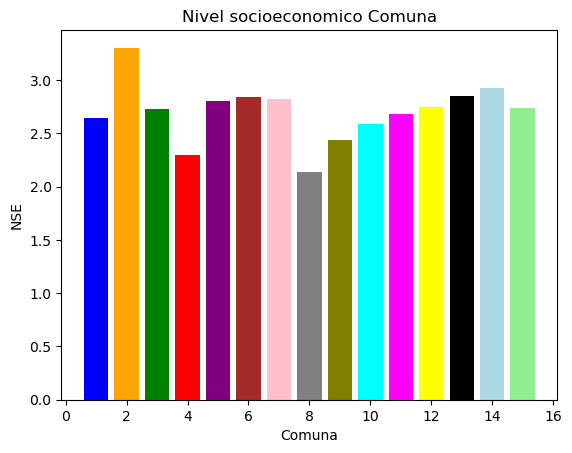

In [51]:
nse_resultados = np.array([nse_resultado, nse_resultado2, nse_resultado_c3, nse_resultado_c4, nse_resultado_c5, nse_resultado_c6, nse_resultado_c7,nse_resultado_c8, nse_resultado_c9, nse_resultado_c10,nse_resultado_c11, nse_resultado_c12,nse_resultado_c13,nse_resultado_c14, nse_resultado_c15])

# Graficamos los resultados en un grafico de barras
import matplotlib.pyplot as plt
colores = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'black', 'lightblue', 'lightgreen']
comunas = np.arange(1, 16)  # Números de comuna del 1 al 15
plt.bar(comunas, nse_resultados, color=colores)
plt.xlabel('Comuna')
plt.ylabel('NSE')
plt.title('Nivel socioeconomico Comuna')
plt.show()

In [52]:
resultados =pd.read_csv ("C:/Users/ASUS/Downloads/DATOS/ResultadosElectorales_2023_Generales.csv")
resultados.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5116\2549365865.py:1: DtypeWarning: Columns (7,10,11,20) have mixed types. Specify dtype option on import or set low_memory=False.
  resultados =pd.read_csv ("C:/Users/ASUS/Downloads/DATOS/ResultadosElectorales_2023_Generales.csv")


,año,eleccion_tipo,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre,...,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
0,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,NULO,0
1,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,IMPUGNADO,0
2,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,RECURRIDO,0
3,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,COMANDO,0
4,2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,...,NATIVOS,349,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,95


In [53]:
resultados [["agrupacion_nombre"]]

,agrupacion_nombre
0,NaN
1,NaN
2,NaN
3,NaN
4,UNION POR LA PATRIA
...,...
5868097,NaN
5868098,UNION POR LA PATRIA
5868099,JUNTOS POR EL CAMBIO
5868100,LA LIBERTAD AVANZA


In [54]:
#para que no me rompa generé una lista de nombres de comunas para las comunas del 1 al 15 en un formato específico 
comunas = [f"Comuna {i:02d}" for i in range(1, 16)]

# filtro las filas donde la columna "cargo_nombre" es "PRESIDENTE Y VICE" y la "seccion_nombre" está en la lista de comunas
df_filtrado = resultados[(resultados["cargo_nombre"] == "PRESIDENTE Y VICE") & (resultados["seccion_nombre"].isin(comunas))]

# ahora lo agrupo los votos  por comunas
df_agrupado = df_filtrado.groupby("seccion_nombre")["votos_cantidad"].sum().reset_index()

print(df_agrupado)


   seccion_nombre  votos_cantidad
0       Comuna 01          121250
1       Comuna 02          100235
2       Comuna 03          112465
3       Comuna 04          134521
4       Comuna 05          117662
5       Comuna 06          124701
6       Comuna 07          133889
7       Comuna 08          109192
8       Comuna 09          114065
9       Comuna 10          114417
10      Comuna 11          135206
11      Comuna 12          152072
12      Comuna 13          164311
13      Comuna 14          152605
14      Comuna 15          124840


In [55]:
#el dato que quiero saber es quien ganó por comuna, entonces ahota lo agrupo por comuna y partido, sumo los votos, y despsues busco el partido con más votos  y armo otro df.
df_agrupado_partidos = df_filtrado.groupby(["seccion_nombre", "agrupacion_nombre"])["votos_cantidad"].sum().reset_index()


idx_partidos = df_agrupado_partidos.groupby("seccion_nombre")["votos_cantidad"].idxmax()
partidos_con_mas_votos = df_agrupado_partidos.loc[idx_partidos]

print("Partidos con más votos por comuna:")
print(partidos_con_mas_votos)

Partidos con más votos por comuna:
   seccion_nombre     agrupacion_nombre  votos_cantidad
2       Comuna 01  JUNTOS POR EL CAMBIO           45975
7       Comuna 02  JUNTOS POR EL CAMBIO           57022
12      Comuna 03  JUNTOS POR EL CAMBIO           39075
19      Comuna 04   UNION POR LA PATRIA           51401
22      Comuna 05  JUNTOS POR EL CAMBIO           43259
27      Comuna 06  JUNTOS POR EL CAMBIO           54873
32      Comuna 07  JUNTOS POR EL CAMBIO           48420
39      Comuna 08   UNION POR LA PATRIA           43136
44      Comuna 09   UNION POR LA PATRIA           39233
47      Comuna 10  JUNTOS POR EL CAMBIO           41986
52      Comuna 11  JUNTOS POR EL CAMBIO           54758
57      Comuna 12  JUNTOS POR EL CAMBIO           64831
62      Comuna 13  JUNTOS POR EL CAMBIO           87321
67      Comuna 14  JUNTOS POR EL CAMBIO           80939
74      Comuna 15   UNION POR LA PATRIA           46077


In [57]:
# Crear un DataFrame a partir de la lista de comunas y el NSE
df_nse = pd.DataFrame({'Comuna': comunas, 'Valor': nse_resultados})

# Imprimir o mostrar el DataFrame resultante
print(df_nse)

       Comuna     Valor
0   Comuna 01  2.647741
1   Comuna 02  3.302602
2   Comuna 03  2.728121
3   Comuna 04  2.299920
4   Comuna 05  2.805794
5   Comuna 06  2.836949
6   Comuna 07  2.824254
7   Comuna 08  2.136344
8   Comuna 09  2.435951
9   Comuna 10  2.589636
10  Comuna 11  2.680035
11  Comuna 12  2.748513
12  Comuna 13  2.848386
13  Comuna 14  2.928850
14  Comuna 15  2.737100


In [60]:
df_final = pd.merge(df_agrupado_partidos, df_nse, left_on="seccion_nombre", right_on="Comuna", how="inner")

print(df_final)

   seccion_nombre                               agrupacion_nombre  \
0       Comuna 01  FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD   
1       Comuna 01                        HACEMOS POR NUESTRO PAIS   
2       Comuna 01                            JUNTOS POR EL CAMBIO   
3       Comuna 01                              LA LIBERTAD AVANZA   
4       Comuna 01                             UNION POR LA PATRIA   
..            ...                                             ...   
70      Comuna 15  FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD   
71      Comuna 15                        HACEMOS POR NUESTRO PAIS   
72      Comuna 15                            JUNTOS POR EL CAMBIO   
73      Comuna 15                              LA LIBERTAD AVANZA   
74      Comuna 15                             UNION POR LA PATRIA   

    votos_cantidad     Comuna     Valor  
0             3981  Comuna 01  2.647741  
1             3230  Comuna 01  2.647741  
2            45975  Comuna 01  2.647741  
3  

In [64]:
# correlacion 
correlation = df_final["Valor"].corr(df_final["votos_cantidad"])
print(f"Correlación entre NSE y cantidad de votos: {correlation}")

Correlación entre NSE y cantidad de votos: 0.023484926640144115


Una correlación de 0.023484926640144115 indica una correlación muy débil entre las variables. sin embargo, esto no significa necesariamente que el NSE no tenga influencia en la cantidad de votos o viceversa.Igualmente vamos a proceder al analisis.  

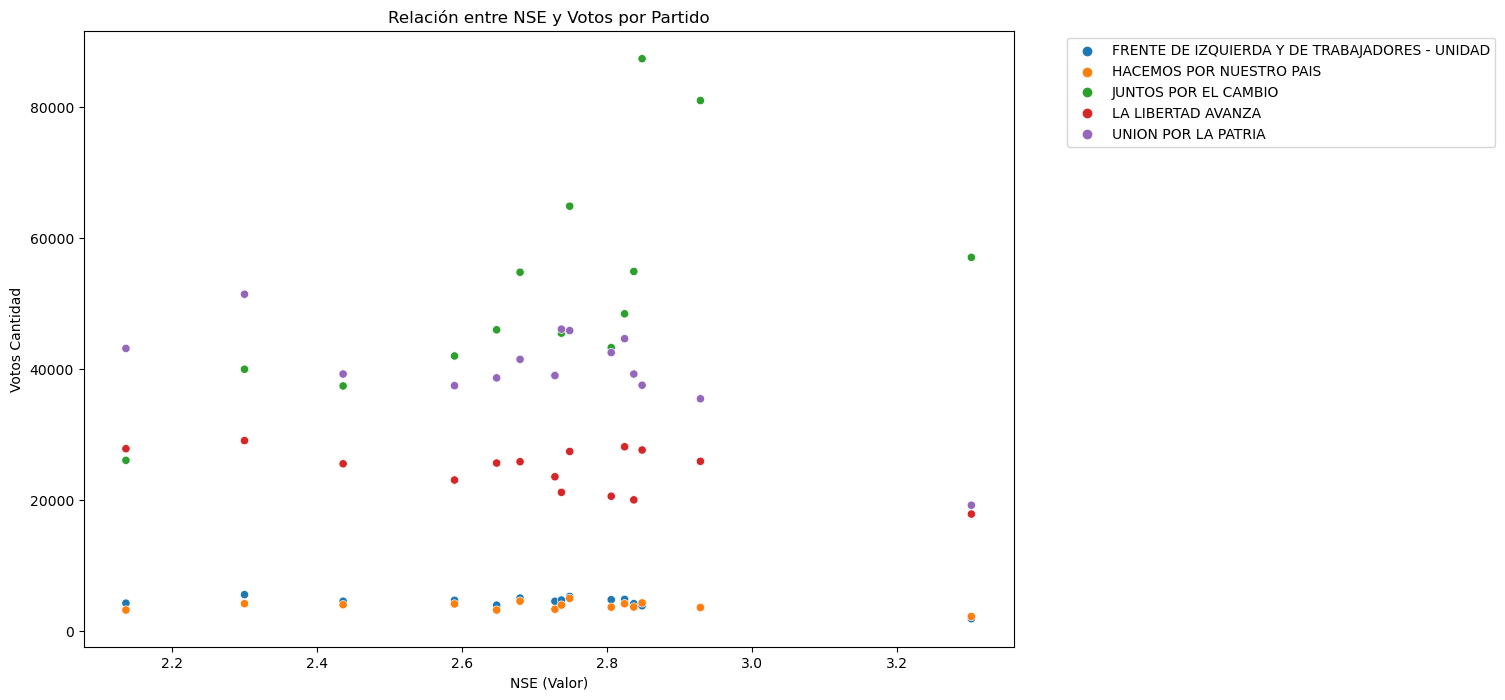

In [65]:
#distribución de votos por partido
plt.figure(figsize=(12, 8))
sns.scatterplot(x="Valor", y="votos_cantidad", hue="agrupacion_nombre", data=df_final)
plt.title("Relación entre NSE y Votos por Partido")
plt.xlabel("NSE (Valor)")
plt.ylabel("Votos Cantidad")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # para mover la leyenda fuera del gráfico
plt.show()

En base a este grafico podemos terminar que el partido que sacó mayor cantidad de votos con mayor nivel socioeconomico es Juntos por el cambio. Por lo que Unión por la partia deberia concentrarse en de cooptar los votos que fluctuan en un NSE 2.4 a 3,que es donde se concentran los votos de Hacemos por nuestro pais, el FIT y la libertad avanza.  

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5116\1986070533.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="seccion_nombre", y="votos_cantidad", data=df_final, ci=None)


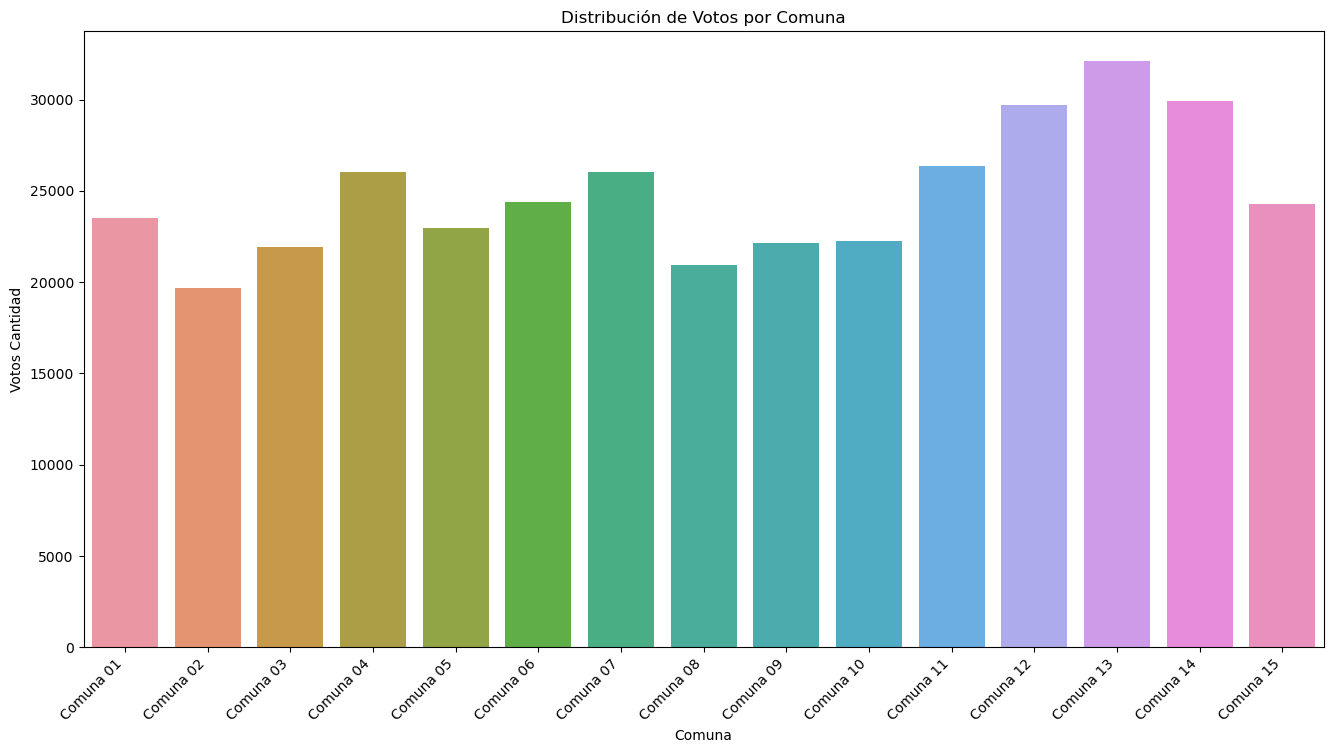

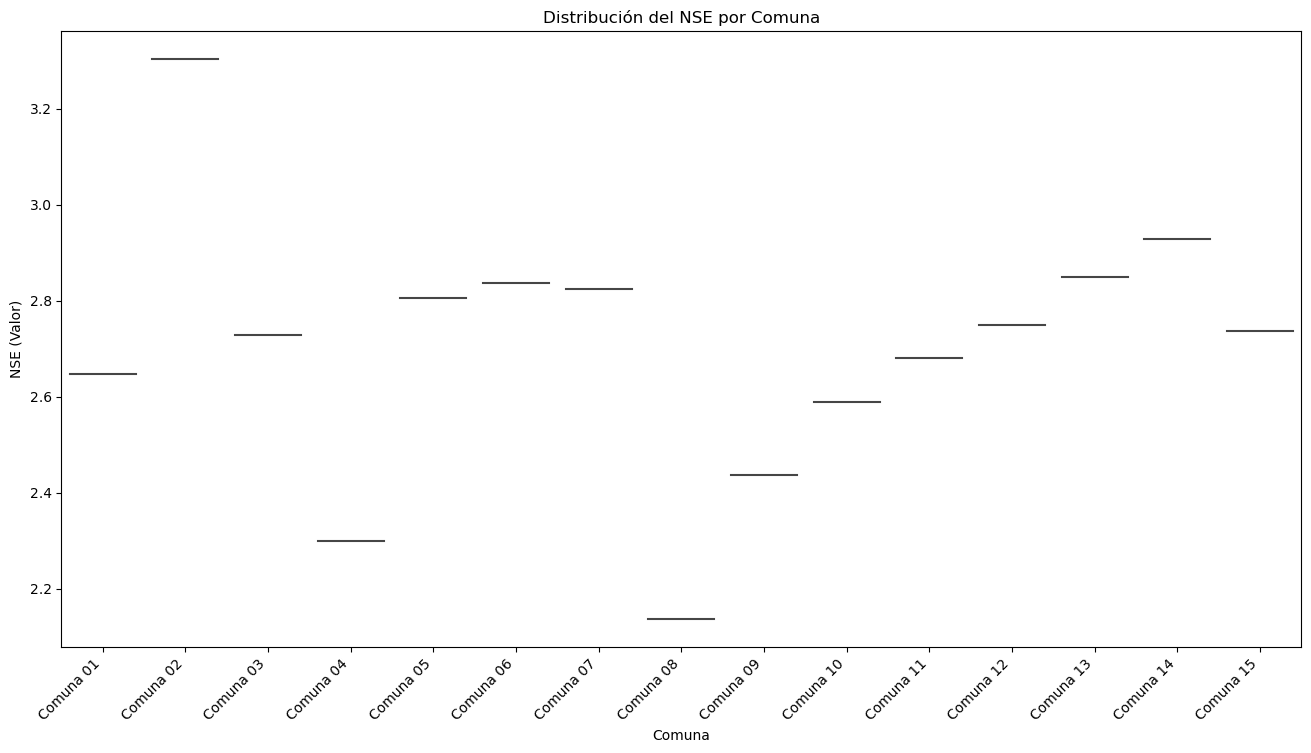

In [66]:
# Graficar la distribución de votos por comuna, para ver 
plt.figure(figsize=(16, 8))
sns.barplot(x="seccion_nombre", y="votos_cantidad", data=df_final, ci=None)
plt.title("Distribución de Votos por Comuna")
plt.xlabel("Comuna")
plt.ylabel("Votos Cantidad")
plt.xticks(rotation=45, ha="right")
plt.show()

# Graficar la distribución del NSE de cada comuna
plt.figure(figsize=(16, 8))
sns.violinplot(x="seccion_nombre", y="Valor", data=df_final)
plt.title("Distribución del NSE por Comuna")
plt.xlabel("Comuna")
plt.ylabel("NSE (Valor)")
plt.xticks(rotation=45, ha="right")
plt.show()

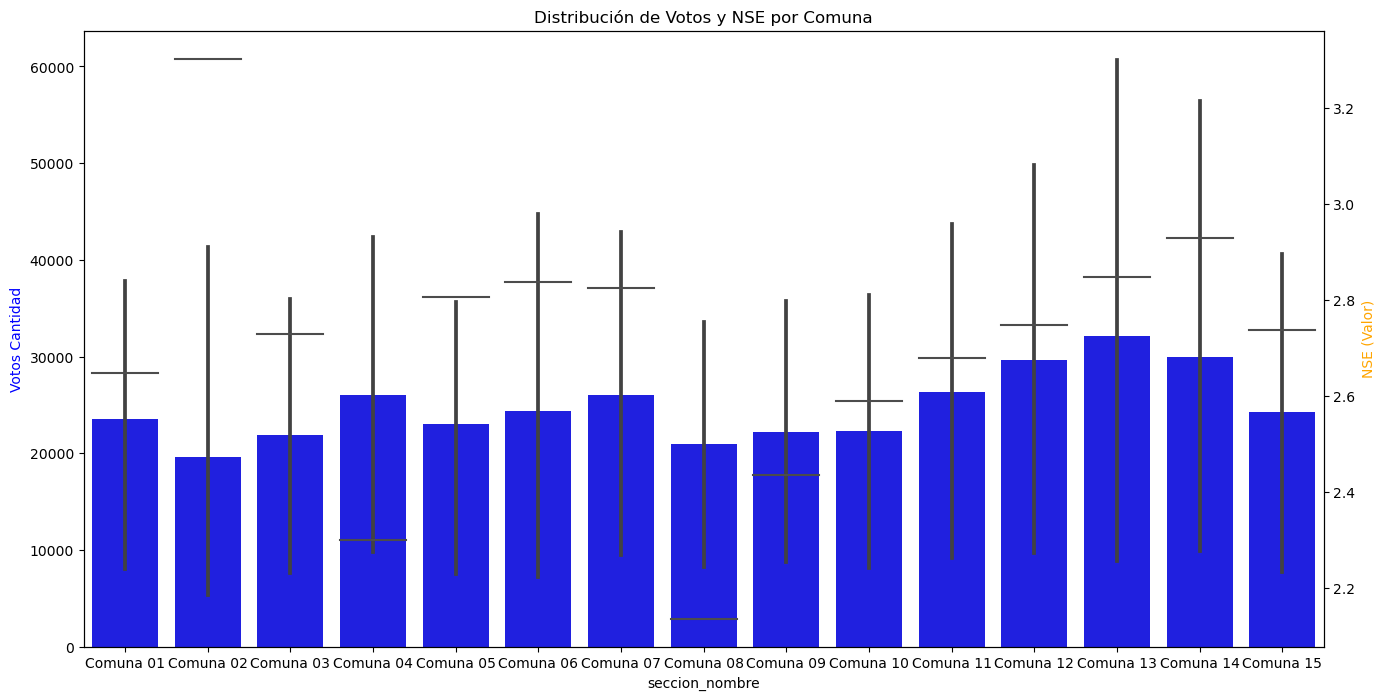

In [63]:
# Crear un gráfico combinado
plt.figure(figsize=(16, 8))
ax1 = plt.gca()  # Obtener el eje actual para votos_cantidad
ax2 = ax1.twinx()  # Crear un segundo eje y para Valor

# Graficar la distribución de votos por comuna en el primer eje y
sns.barplot(x="seccion_nombre", y="votos_cantidad", data=df_final, color='blue', ax=ax1)
ax1.set_ylabel('Votos Cantidad', color='blue')

# Graficar la distribución del NSE por comuna en el segundo eje y
sns.violinplot(x="seccion_nombre", y="Valor", data=df_final, ax=ax2, color='orange')
ax2.set_ylabel('NSE (Valor)', color='orange')

plt.title("Distribución de Votos y NSE por Comuna")
plt.xlabel("Comuna")
plt.xticks(rotation=45, ha="right")
plt.show()